# Desarrollo de una red neuronal con keras para el reconocimiento de números en patrones

## Dependencias

- Tensorflow
- Keras
- matplotlib
- pylab

In [1]:
"""
    Importamos las librerías necesarias para poder crear nuestras redes neuronales
"""
import os
import time
import unittest
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
"""
    Primero compilamos la red definiendo una función de pérdida y un optimizador: en nuestro caso seleccionamos
    categorical_crossentropy, porque tenemos múltiples categorías (como en los números 0-9). La función
    number_recognition_model nos crea un modelo de Sequential para la predicción de números expresados en patrones de 35
    números entre 0 y 1 esta función genera tre capas la primera con 32 neuronas con función de activación "relu" otra
    con el doble de la anterior con 64 y también función de activación "relu" y la capa de salida con 10 neuronas con
    función de activación "softmax".
"""


def number_recognition_model():
    dropout = Dropout(0.12)
    layer_one = Dense(32, activation='relu', input_shape=(35,))
    layer_two = Dense(64, activation='relu')
    layer_three = Dense(32, activation='relu')
    layer_four = Dense(10, activation='softmax')

    number_model = Sequential()
    number_model.add(layer_one)
    number_model.add(layer_two)
    number_model.add(dropout)
    number_model.add(layer_three)
    number_model.add(layer_four)
    number_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return number_model

In [4]:
"""
    Cargamos los datos de entrenamiento para la primera versión de los datos de entrada
"""

train_data = np.loadtxt('./number_patterns.txt', delimiter=',')
batch = train_data

In [7]:
"""
    Cargamos los datos de salida de la primera versión de los datos de salida
"""

target_data = np.loadtxt('./number_target.txt', delimiter=',')

In [9]:
"""
    Llamar la función para tener el modelo creado con anterioridad
"""

model = number_recognition_model()

In [10]:
"""
    Mostramos un resumen de la red neuronal que se utilizara
"""
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 5,674
Trainable params: 5,674
Non-trainable params: 0
_________________________________________________________________


In [11]:
"""
Tomar muestra del tiempo para ver cuanto demora la ejecución en milisegundos
"""
start = time.time()

In [12]:
"""
    Entrenamiento del modelo con variaciones en epochs y batch_size
"""
history = model.fit(train_data, target_data,  epochs=200, verbose=0)

In [13]:
"""
    Muestra del tiempo en el que comenzó y finalizo
"""
finish = time.time()
print((finish - start) * 1000, 'ms o', (finish - start), 's')
print('Tiempo de inicio: ', time.asctime(time.localtime(start)))
print('Tiempo de finalización: ', time.asctime(time.localtime(finish)))
print()

564.0175342559814 ms o 0.5640175342559814 s
Tiempo de inicio:  Fri Jul 23 21:51:25 2021
Tiempo de finalización:  Fri Jul 23 21:51:25 2021



In [14]:
"""
    Evaluamos el modelo con sus datos de entrenamiento y verificamos la precisión de este
"""
scores = model.evaluate(train_data, target_data)
print('\n%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))
print()

1/1 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 1.0000

accuracy: 100.00%



In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
195,0.037587,1.0,195
196,0.024500,1.0,196
197,0.027172,1.0,197
198,0.018744,1.0,198
199,0.046839,1.0,199


In [16]:
def plot_history(history):     
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],'r',
           label='Accuracy')
    plt.plot(hist['epoch'], hist['loss'],'b',
            label = 'Loss')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

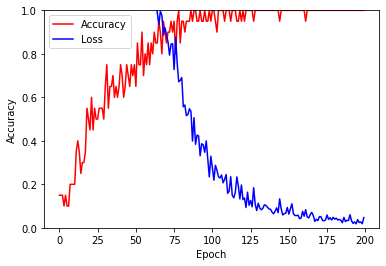

In [17]:
plot_history(history)

In [18]:
"""
    Hacemos una predicción con los datos generales de entrada
"""
predict_data = model.predict(train_data)

In [19]:
"""
    Ingresamos datos de test para el número 6 para luego verificar el resultado
"""

test_data = np.loadtxt('./testing_data.txt', delimiter=',')
test_target = np.loadtxt('./testing_target.txt', delimiter=',')

In [20]:
predictions = model.predict(test_data)

#print(predictions)

predictions = np.argmax(predictions, axis=1)
test_target = np.argmax(test_target, axis=1)

In [22]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_target, predictions)
acc = matrix.diagonal()

matrix, str(acc.sum() / 10 * 100) + '%'

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [23]:
"""
    Salvamos el modelo para poder volver a utilizar nuestra red neuronal
"""
model.save('numbers_model.h5')